In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
#from keras.optimizers import SGD, Adam
#from tqdm import tqdm


In [2]:
#%%

#class_names = ["Deformation_With_Scratch_train","No_Defect_train","Plateform_Powder_Uneven_train","Powder Uneven_With_Scratch_train","Powder_Uneven_train","Deformation_With_Scratch_test","No_Defect_test","Plateform_Powder_Uneven_test","Powder Uneven_With_Scratch_test","Powder_Uneven_test"]
class_names = ["Deformation_With_Scratch","No_Defect","Plateform_Powder_Uneven","Powder Uneven_With_Scratch","Powder_Uneven"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)
#%%
def load_data(): #定義函數
    datasets = ['3d_train', '3d_test']#資料夾
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in (os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                #cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output
#%%

#%%

In [3]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading 3d_train
Loading 3d_test


In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((1235, 64, 64), (1235,), (657, 64, 64), (657,))

In [5]:
train_images = train_images.reshape(train_images.shape[0], 64, 64, 1).astype("float32")
test_images = test_images.reshape(test_images.shape[0], 64, 64, 1).astype("float32")

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
input_shape = (64, 64, 1)


model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2), #避免過度 隨機丟掉
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Flatten(),
    Dropout(0.5),
    Dense(5, activation='softmax') #輸出層，分類用softmax
])
model.compile(optimizer = 'adam', #SGD(lr=0.1)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
#model.add(layers.Flatten())
#model.add(layers.Dense(120, activation='relu')) 
#model.add(layers.Dense(84, activation='relu')) #激活函數
#model.add(layers.Dense(5, activation='softmax')) #輸出層

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 128)         0

In [10]:

history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels),
                    verbose=0,
                    batch_size=128, epochs=10)



InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\IPython\core\interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\IPython\core\interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\NMPA\AppData\Local\Temp\ipykernel_9488\2587891874.py", line 1, in <cell line: 1>
      history = model.fit(train_images, train_labels,
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\keras\losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\Users\NMPA\anaconda3\envs\TF\lib\site-packages\keras\backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [32,5] and labels shape [160]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_792]

NameError: name 'history' is not defined

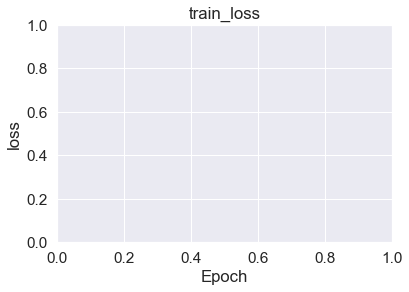

In [ ]:
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])

In [ ]:
'預測'
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
#%%
'混淆矩陣'
CM = confusion_matrix(test_labels, pred_labels)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print(accuracy(CM))
#%%
'混淆矩陣視覺化，看錯誤'
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0408 - accuracy: 0.9876 - 667ms/epoch - 2ms/step


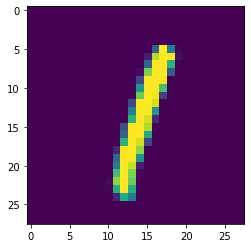

In [ ]:
plt.imshow(test_images[5])

In [ ]:
pred_image = test_images[5].reshape(1, 28, 28, 1)

In [ ]:
np.round(model.predict(pred_image))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)